# Color nonlinearities

The idea is to generate a gradient of colors which are linearly spaced in the ATD color spaces (oponent color channels) and then check if the response of a model is linear or not (it shouldn't be).

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%cd ..
from color_matrices import *

/media/disk/users-muten/vitojor/PerceptualTests


## Generating the colors

In [2]:
N = 11
img_size = (256,256)

In [3]:
atd = np.array([[10,a,0] for a in np.linspace(-20,20,N)]).T
atd.shape

(3, 11)

In [4]:
def atd2rgb(atd):
    """
    Expects and atd color column vector.
    """
    rgb = Matd2xyz@Mxyz2ng@atd
    rgb = np.power(rgb, gamma[:,None])
    return rgb

In [5]:
rgb = atd2rgb(atd)
rgb.shape

(3, 11)

In [6]:
imgs = np.ones(shape=(*img_size,3,N))
imgs *= rgb[None,None,:,:]

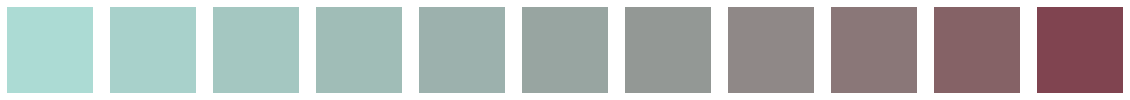

In [7]:
fig, ax = plt.subplots(1,N, figsize=(20,10))

for i in range(N):
    ax[i].imshow(imgs[:,:,:,i])
    ax[i].axis('off')
plt.show()

## Passing the colors through the network

As an example we'll use a fake model that we can override at any time:

In [8]:
class FakeNetwork():
    def __call__(self, X):
        return X
    def predict(self, X):
        return self(X)

In [9]:
model = FakeNetwork()

Adjust the shape of `imgs`:

In [10]:
batch_imgs = imgs.transpose(3,0,1,2)
batch_imgs.shape

(11, 256, 256, 3)

Obtain the outputs:

In [11]:
outputs = model.predict(batch_imgs)

Get the readouts as the distance to the central image (white):

In [12]:
readouts = (outputs-outputs[N//2])**2
readouts = np.sqrt(np.sum(readouts.reshape(N,-1), axis=-1))
readouts

array([ 76.75116965,  63.11775673,  48.77049685,  33.58681783,
        17.4043428 ,   0.        ,  18.94752685,  39.93188401,
        63.78579903,  92.14179908, 129.30972682])

Plot the results:

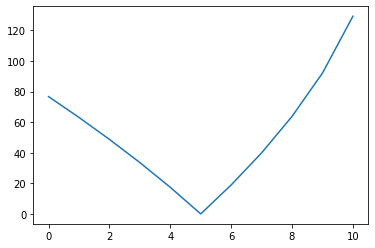

In [13]:
plt.figure()
plt.plot(readouts)
plt.show()